#  Linear Regression



# Data Description

Bike Sharing 
    Rows: 17379, Attributes: 17
    
Bike sharing systems are new generation of traditional bike rentals where whole process from membership, rental and return back has become automatic. Through these systems, user is able to easily rent a bike from a particular position and return back at another position. Currently, there are about over 500 bike-sharing programs around the world which is composed of over 500 thousands bicycles. Today, there exists great interest in these systems due to their important role in traffic, environmental and health issues. 
    
Attribute Information:

instant: record index
dteday : date
season : season (1:springer, 2:summer, 3:fall, 4:winter)
yr : year (0: 2011, 1:2012)
mnth : month ( 1 to 12)
hr : hour (0 to 23)
holiday : weather day is holiday or not (extracted from [Web Link])
weekday : day of the week
workingday : if day is neither weekend nor holiday is 1, otherwise is 0.
weathersit : 
    1: Clear, Few clouds, Partly cloudy, Partly cloudy
    2: Mist + Cloudy, Mist + Broken clouds, Mist + Few clouds, Mist
    3: Light Snow, Light Rain + Thunderstorm + Scattered clouds, Light Rain + Scattered clouds
    4: Heavy Rain + Ice Pallets + Thunderstorm + Mist, Snow + Fog 
temp : Normalized temperature in Celsius. The values are derived via (t-t_min)/(t_max-t_min), t_min=-8, t_max=+39 (only in hourly scale)
atemp: Normalized feeling temperature in Celsius. The values are derived via (t-t_min)/(t_max-t_min), t_min=-16, t_max=+50 (only in hourly scale)
hum: Normalized humidity. The values are divided to 100 (max)
windspeed: Normalized wind speed. The values are divided to 67 (max)
casual: count of casual users
registered: count of registered users
cnt: count of total rental bikes including both casual and registered


In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline


In [25]:
df = pd.read_csv("train.csv")
df

,Choice,A_follower_count,A_following_count,A_listed_count,A_mentions_received,A_retweets_received,A_mentions_sent,A_retweets_sent,A_posts,A_network_feature_1,...,B_following_count,B_listed_count,B_mentions_received,B_retweets_received,B_mentions_sent,B_retweets_sent,B_posts,B_network_feature_1,B_network_feature_2,B_network_feature_3
0,0,228,302,3,0.583979,0.100503,0.100503,0.100503,0.362150,2,...,29808,1689,15.430498,3.984029,8.204331,0.332423,6.988815,66,75.530303,1916.893939
1,0,21591,1179,228,90.456506,25.798292,5.709329,1.111159,5.176620,369,...,848,1610,40.495021,8.943607,3.227677,0.564343,1.070321,163,132.030675,2931.515337
2,0,7310,1215,101,25.503644,9.556347,5.361519,0.591206,3.589718,95,...,482,206,0.734696,0.354379,0.603202,0.100503,0.603202,3,10.333333,277.333333
3,0,20,7,2,7.690824,0.277306,1.331508,0.100503,2.830627,6,...,17637,278,572.874856,390.293681,27.552040,7.167557,32.101906,1762,23.469296,1395.845634
4,1,45589,862,2641,148.854279,36.998884,27.881768,3.333492,23.861282,551,...,1711,181,21.601866,3.581661,6.764657,1.119727,4.563246,85,48.500000,1993.627907
5,0,285735,276251,3417,19.327582,7.292016,0.100503,0.100503,0.100503,60,...,1500,474,40.592512,5.923009,19.648064,1.861765,12.261029,128,107.431818,2481.136364
6,0,285735,276251,3417,19.327582,7.292016,0.100503,0.100503,0.100503,60,...,1001,15117,266.013874,54.345230,13.111904,0.334766,13.665173,928,172.986229,5321.646186
7,1,9512,12,213,52.167068,23.182288,0.362150,0.100503,6.806045,195,...,710,959,7.368643,2.088375,1.598798,0.595812,1.332849,29,205.533333,4302.466667
8,1,2273871,4524,11946,6782.405338,2944.524245,12.955723,2.791861,66.206208,21678,...,551,6209,493.256379,206.660552,4.115212,0.854539,3.075463,2021,75.970098,3865.446569
9,0,182598,1402,3831,145.844910,74.002958,23.549189,0.100503,15.953243,567,...,1299,9950,189.755230,67.310223,11.294831,2.567269,10.933766,791,185.542033,5535.939774


### Normalize data

In [24]:
# Normalize data
from pandas import Series
from sklearn.preprocessing import MinMaxScaler

# load the dataset and print the first 5 rows
series = Series.from_csv('train.csv', header=0)
print(series.head())

# prepare data for normalization
values = series.values
values = values.reshape((len(values), 1))

# train the normalization
scaler = MinMaxScaler(feature_range=(0, 1))
scaler = scaler.fit(values)
print('Min: %f, Max: %f' % (scaler.data_min_, scaler.data_max_))

# normalize the dataset and print the first 5 rows
normalized = scaler.transform(values)
for i in range(5):
	print(normalized[i])
    
# inverse transform and print the first 5 rows
"""inversed = scaler.inverse_transform(normalized)
for i in range(5):
	print(inversed[i])"""

Choice
0      228
0    21591
0     7310
0       20
1    45589
Name: A_follower_count, dtype: int64
Min: 16.000000, Max: 36543194.000000
[  5.80135641e-06]
[ 0.0005904]
[ 0.0001996]
[  1.09459555e-07]
[ 0.0012471]


/Users/chiragjain/anaconda3/lib/python3.6/site-packages/sklearn/utils/validation.py:475: DataConversionWarning: Data with input dtype int64 was converted to float64 by MinMaxScaler.
  warnings.warn(msg, DataConversionWarning)


'inversed = scaler.inverse_transform(normalized)\nfor i in range(5):\n\tprint(inversed[i])'

### Standardize time series data

In [23]:
# Standardize time series data
from pandas import Series
from sklearn.preprocessing import StandardScaler
from math import sqrt

# load the dataset and print the first 5 rows
series = Series.from_csv('train.csv', header=0)
print(series.head())
# prepare data for standardization
values = series.values
values = values.reshape((len(values), 1))
# train the standardization
scaler = StandardScaler()
scaler = scaler.fit(values)
print('Mean: %f, StandardDeviation: %f' % (scaler.mean_, sqrt(scaler.var_)))
# standardization the dataset and print the first 5 rows
normalized = scaler.transform(values)
for i in range(5):
	print(normalized[i])
# inverse transform and print the first 5 rows
inversed = scaler.inverse_transform(normalized)
for i in range(5):
	print(inversed[i])

Choice
0      228
0    21591
0     7310
0       20
1    45589
Name: A_follower_count, dtype: int64
Mean: 649883.950364, StandardDeviation: 2028603.000206
[-0.32024795]
[-0.30971706]
[-0.31675688]
[-0.32035048]
[-0.29788724]
[ 228.]
[ 21591.]
[ 7310.]
[ 20.]
[ 45589.]


/Users/chiragjain/anaconda3/lib/python3.6/site-packages/sklearn/utils/validation.py:475: DataConversionWarning: Data with input dtype int64 was converted to float64 by StandardScaler.
  warnings.warn(msg, DataConversionWarning)


In [3]:
np.any(df.isnull())

False

In [4]:
df.columns.values

array(['Choice', 'A_follower_count', 'A_following_count', 'A_listed_count',
       'A_mentions_received', 'A_retweets_received', 'A_mentions_sent',
       'A_retweets_sent', 'A_posts', 'A_network_feature_1',
       'A_network_feature_2', 'A_network_feature_3', 'B_follower_count',
       'B_following_count', 'B_listed_count', 'B_mentions_received',
       'B_retweets_received', 'B_mentions_sent', 'B_retweets_sent',
       'B_posts', 'B_network_feature_1', 'B_network_feature_2',
       'B_network_feature_3'], dtype=object)

In [5]:
df.shape

(5500, 23)

In [6]:
df.size

126500

In [7]:
df.isnull().values.any()

False

In [8]:
#to check missing values
df.isnull().sum()

Choice                 0
A_follower_count       0
A_following_count      0
A_listed_count         0
A_mentions_received    0
A_retweets_received    0
A_mentions_sent        0
A_retweets_sent        0
A_posts                0
A_network_feature_1    0
A_network_feature_2    0
A_network_feature_3    0
B_follower_count       0
B_following_count      0
B_listed_count         0
B_mentions_received    0
B_retweets_received    0
B_mentions_sent        0
B_retweets_sent        0
B_posts                0
B_network_feature_1    0
B_network_feature_2    0
B_network_feature_3    0
dtype: int64

In [9]:
df.describe()

,Choice,A_follower_count,A_following_count,A_listed_count,A_mentions_received,A_retweets_received,A_mentions_sent,A_retweets_sent,A_posts,A_network_feature_1,...,B_following_count,B_listed_count,B_mentions_received,B_retweets_received,B_mentions_sent,B_retweets_sent,B_posts,B_network_feature_1,B_network_feature_2,B_network_feature_3
count,5500.000000,5.500000e+03,5.500000e+03,5500.000000,5.500000e+03,5500.000000,5500.000000,5500.000000,5500.000000,5500.000000,...,5500.000000,5500.000000,5.500000e+03,5500.000000,5500.000000,5500.000000,5500.000000,5500.000000,5500.000000,5500.000000
mean,0.509455,6.498840e+05,1.265895e+04,5952.453273,2.666032e+03,1032.371839,6.011873,1.109924,9.090730,5267.768000,...,12738.259818,5903.148364,2.554598e+03,997.149954,6.099658,1.106236,9.505821,5254.933636,85.024196,3745.175480
std,0.499956,2.028787e+06,4.900867e+04,17339.141191,2.916543e+04,10954.953223,9.519797,1.910104,18.311060,28946.777345,...,50054.520874,16298.462018,2.508873e+04,9342.006880,9.729557,1.939914,19.424680,26778.820125,106.689384,5518.399590
min,0.000000,1.600000e+01,0.000000e+00,0.000000,1.005034e-01,0.100503,0.100503,0.100503,0.100503,0.000000,...,0.000000,0.000000,1.005034e-01,0.100503,0.100503,0.100503,0.100503,0.000000,0.000000,0.000000
25%,0.000000,2.663750e+03,3.220000e+02,85.000000,3.453649e+00,0.716816,0.359534,0.100503,0.632440,12.000000,...,322.000000,75.000000,3.260473e+00,0.714556,0.356943,0.100503,0.822584,11.000000,15.176568,1206.500000
50%,1.000000,4.558900e+04,7.780000e+02,932.000000,4.876542e+01,14.029113,2.299666,0.341936,3.555194,195.000000,...,773.000000,890.000000,4.876542e+01,14.029113,2.251398,0.341936,3.342999,190.000000,54.925234,2206.420734
75%,1.000000,3.927380e+05,2.838000e+03,6734.000000,3.498196e+02,118.704407,7.198330,1.320681,10.691878,1323.000000,...,2838.000000,6734.000000,3.743699e+02,107.081021,6.866840,1.320681,10.600502,1323.000000,112.191489,4349.908608
max,1.000000,3.654319e+07,1.165830e+06,549144.000000,1.145219e+06,435825.874241,76.809514,16.290540,193.072418,920838.000000,...,664324.000000,549144.000000,1.145219e+06,435825.874241,76.809514,16.290540,193.072418,920838.000000,1861.583333,75526.083333


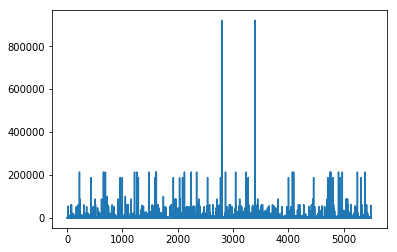

In [10]:
plt.plot(df.loc[:, 'B_network_feature_1'])

(array([  5.45300000e+03,   3.00000000e+00,   4.20000000e+01,
          0.00000000e+00,   0.00000000e+00,   0.00000000e+00,
          0.00000000e+00,   0.00000000e+00,   0.00000000e+00,
          2.00000000e+00]),
 array([      0. ,   92083.8,  184167.6,  276251.4,  368335.2,  460419. ,
         552502.8,  644586.6,  736670.4,  828754.2,  920838. ]),
 <a list of 10 Patch objects>)

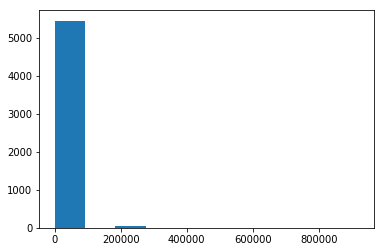

In [11]:
plt.hist(df.loc[:, 'B_network_feature_1'])

In [12]:
X = df.iloc[:, :-1].copy()
X

,Choice,A_follower_count,A_following_count,A_listed_count,A_mentions_received,A_retweets_received,A_mentions_sent,A_retweets_sent,A_posts,A_network_feature_1,...,B_follower_count,B_following_count,B_listed_count,B_mentions_received,B_retweets_received,B_mentions_sent,B_retweets_sent,B_posts,B_network_feature_1,B_network_feature_2
0,0,228,302,3,0.583979,0.100503,0.100503,0.100503,0.362150,2,...,34463,29808,1689,15.430498,3.984029,8.204331,0.332423,6.988815,66,75.530303
1,0,21591,1179,228,90.456506,25.798292,5.709329,1.111159,5.176620,369,...,39262,848,1610,40.495021,8.943607,3.227677,0.564343,1.070321,163,132.030675
2,0,7310,1215,101,25.503644,9.556347,5.361519,0.591206,3.589718,95,...,3622,482,206,0.734696,0.354379,0.603202,0.100503,0.603202,3,10.333333
3,0,20,7,2,7.690824,0.277306,1.331508,0.100503,2.830627,6,...,19562,17637,278,572.874856,390.293681,27.552040,7.167557,32.101906,1762,23.469296
4,1,45589,862,2641,148.854279,36.998884,27.881768,3.333492,23.861282,551,...,7554,1711,181,21.601866,3.581661,6.764657,1.119727,4.563246,85,48.500000
5,0,285735,276251,3417,19.327582,7.292016,0.100503,0.100503,0.100503,60,...,11147,1500,474,40.592512,5.923009,19.648064,1.861765,12.261029,128,107.431818
6,0,285735,276251,3417,19.327582,7.292016,0.100503,0.100503,0.100503,60,...,185616,1001,15117,266.013874,54.345230,13.111904,0.334766,13.665173,928,172.986229
7,1,9512,12,213,52.167068,23.182288,0.362150,0.100503,6.806045,195,...,8120,710,959,7.368643,2.088375,1.598798,0.595812,1.332849,29,205.533333
8,1,2273871,4524,11946,6782.405338,2944.524245,12.955723,2.791861,66.206208,21678,...,298668,551,6209,493.256379,206.660552,4.115212,0.854539,3.075463,2021,75.970098
9,0,182598,1402,3831,145.844910,74.002958,23.549189,0.100503,15.953243,567,...,117913,1299,9950,189.755230,67.310223,11.294831,2.567269,10.933766,791,185.542033


In [13]:
T = df.loc[:, 'B_network_feature_1'].copy()
print(T)

0          66
1         163
2           3
3        1762
4          85
5         128
6         928
7          29
8        2021
9         791
10        696
11        568
12         11
13        211
14         17
15         11
16       4801
17        211
18          3
19        758
20      54819
21        568
22        562
23      16646
24        296
25        696
26        568
27         12
28        791
29        239
        ...  
5470      764
5471      973
5472      466
5473      696
5474      219
5475        0
5476     2662
5477       36
5478     4067
5479       19
5480       14
5481       32
5482       47
5483        9
5484        0
5485        6
5486      809
5487      113
5488       68
5489      296
5490    58691
5491       29
5492      894
5493     5210
5494        2
5495    23958
5496        1
5497       85
5498      696
5499     1280
Name: B_network_feature_1, Length: 5500, dtype: int64


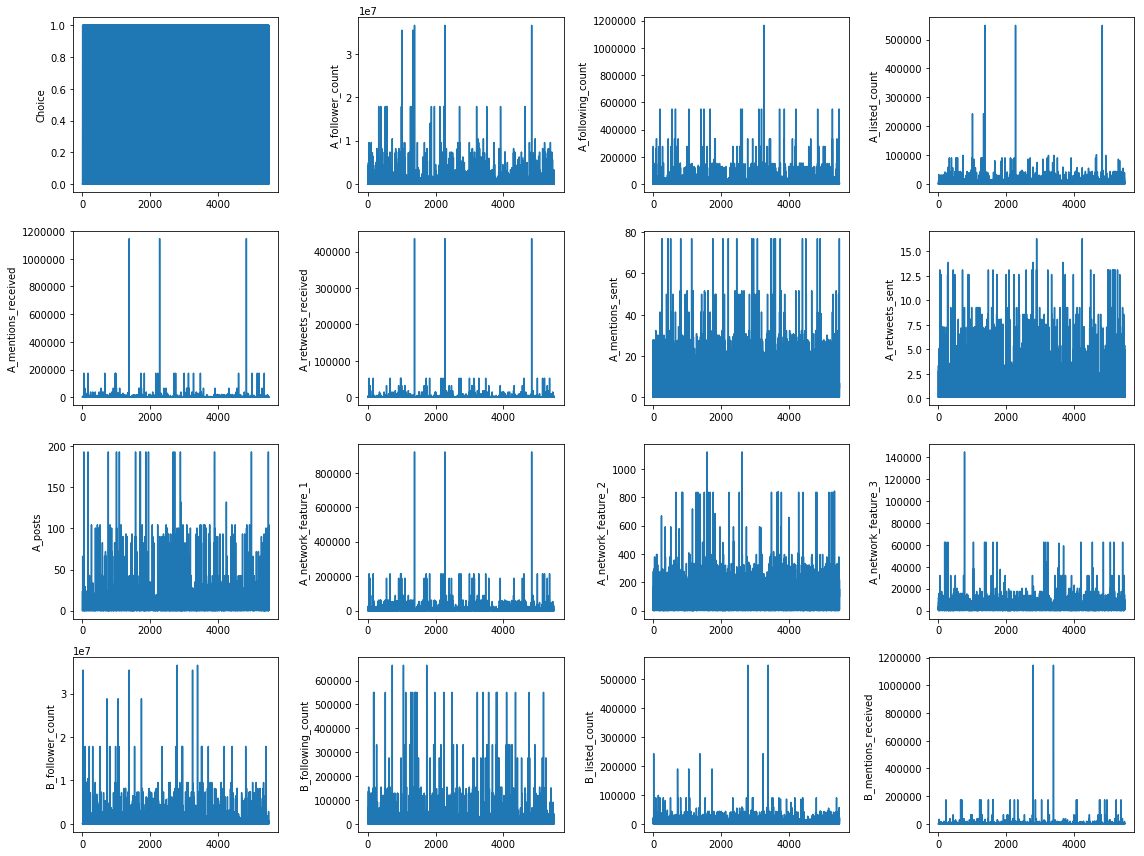

In [14]:
fig = plt.figure(figsize=(16,12))
plt.clf()
for i in range(16):
    plt.subplot(4, 4, i+1)
    plt.plot(X.iloc[:, i])
    plt.ylabel(X.columns.values[i])
fig.tight_layout()  

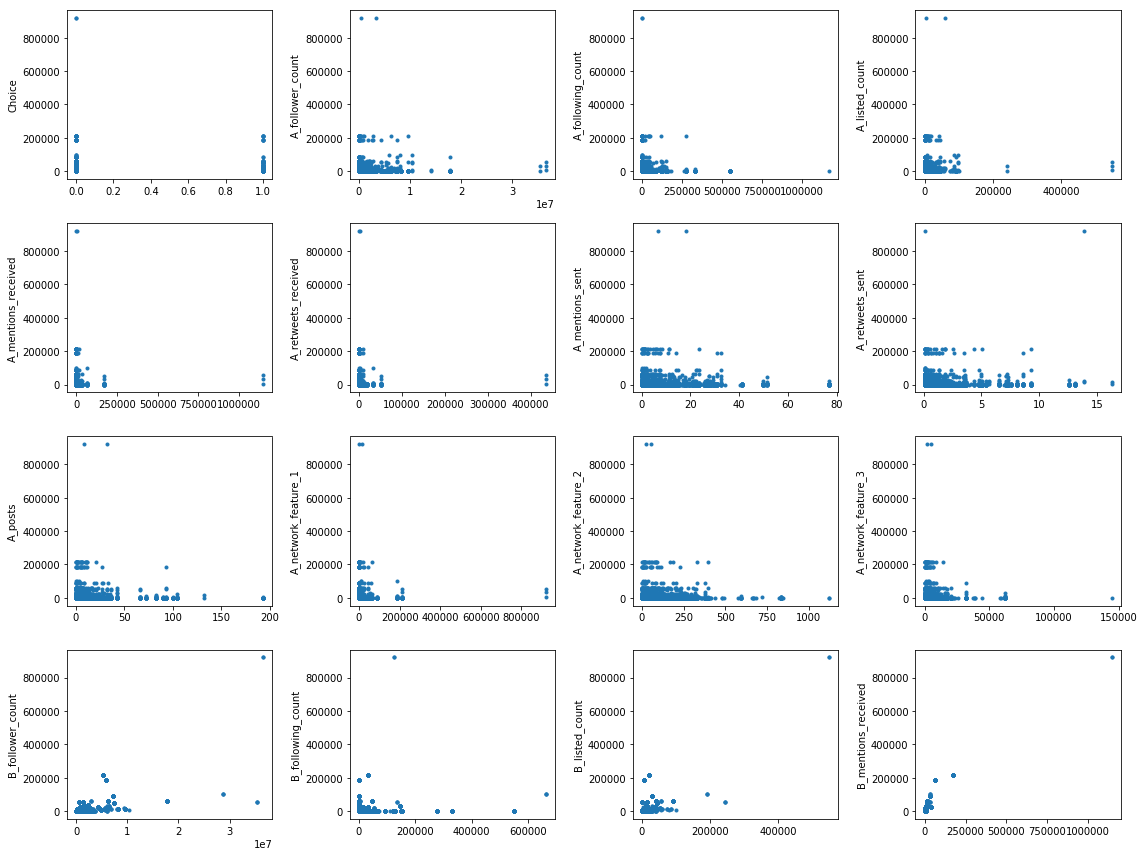

In [15]:
fig = plt.figure(figsize = (16, 12))
for i in range(16):
    plt.subplot(4, 4, i+1)
    plt.plot(X.iloc[:,i], T, '.')
    plt.ylabel(X.columns.values[i])
fig.tight_layout()  

In [16]:
X = X.iloc[:,2:].copy()
D = pd.concat([X, T], axis=1)


ValueError: operands could not be broadcast together with shapes (5500,) (5500,2) 

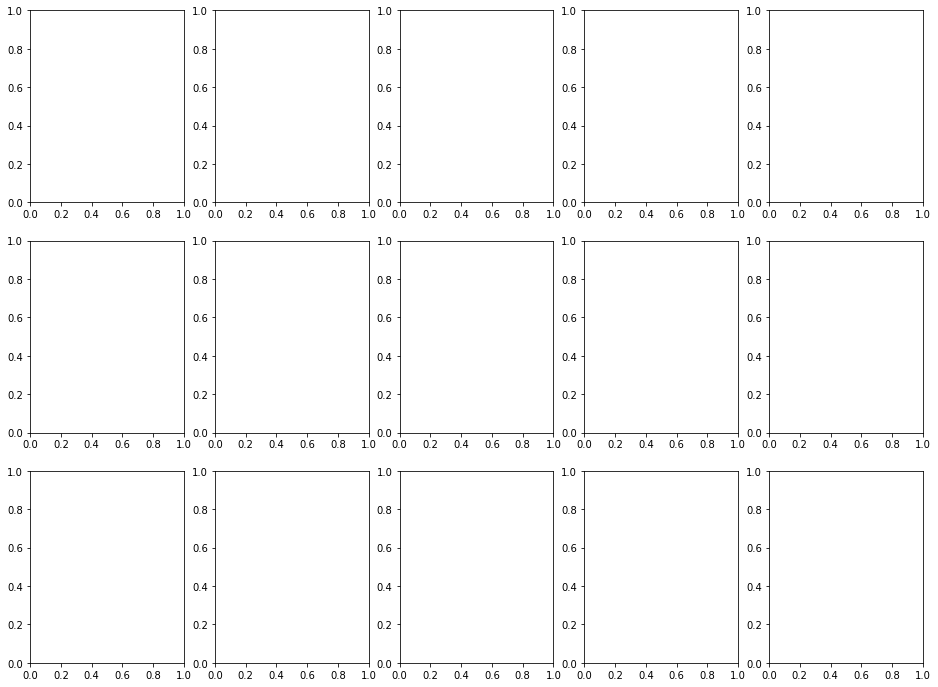

In [17]:
def area_scatter():
    fig, axes = plt.subplots(3,5)
    fig.set_figheight(12)
    fig.set_figwidth(16)
    for i,c  in enumerate(X.columns.values):
        D.plot.hexbin(c, 'B_network_feature_1', ax=axes[int(i/5), i%5])
    fig.tight_layout()
    
area_scatter()

#### Preliminary Observations

(a) From the hexabinary plots it can be observed that - 

    (1) the density of rentals is more when temperature is between 0.2 to 0.7. 
    (2) the density of retals is more when the windspeed is lower than 0.25. This means that higher the windspeed lower the no. of bike rentals.
    (3) the density of retals is more when the humidity is greater than 0.5. This means that higher the humidity, more are the no. of bike rentals.

(b) The bike rentals are been significantly more on the working days as compared to the holidays.

(c) It can be observed that on the occassions of Heavy Rain, Ice Pallets, Thunderstorm, Mist, Snow and Fog the rented bikes are almost negligible. 

(d) The number of rented bikes in the year 2012 are greater than in the year 2011. 

(e) It can be seen with the help of the scatter plot of the variable 'instant' that the bike rentals have been increased in the later data samples.




# Method


Linear regression tries to find the best possible predictive model for the given dataset and the target values. We use two methods for this.

First is Least Squares Method.

Least-squares method uses sum of squared error to determine how good the model is. Hence, we try to minimize the sum of squares of error for each point in the base matrix X. Considering our predictive linear model to be of the form Y = WX , we try to calculate W such that it minimizes the sum of squares of error using derivatives and derive the formula W =  Inverse(Transpose(X) @ X) @ Transpose(X) @ T.

Second method is Least Mean Squares Method. 

This introduces a step by step calculation as compared to least squares which requires the entire dataset to calculate W, the weight matrix. Calculating weogjt for each point in the dataset one by one and updating the weight matrix along the computation reduces the memory required and computation cost. This method follows the following formula for updating the weight sample W(k+1) = W(k) - alpha(Transpose(W(k))*X(k) - T(k))X(k).


### Super Classs Definition

In [30]:
import numpy as np 
from abc import ABC, abstractmethod
import pandas as pd
import matplotlib.pyplot as plt

# Super class for machine learning models 

class BaseModel(ABC):
    """ Super class for ITCS Machine Learning Class"""
    
    @abstractmethod
    def train(self, X, T):
        pass

    @abstractmethod
    def use(self, X):
        pass

    
class LinearModel(BaseModel):
    """
        Abstract class for a linear model 
        
        Attributes
        ==========
        w       ndarray
                weight vector/matrix
    """

    def __init__(self):
        """
            weight vector w is initialized as None
        """
        self.w = None

    def _check_matrix(self, mat, name):
        if len(mat.shape) != 2:
            raise ValueError(''.join(["Wrong matrix ", name]))
        
    # add a basis
    def add_ones(self, X):
        """
            add a column basis to X input matrix
        """
        self._check_matrix(X, 'X')
        return np.hstack((np.ones((X.shape[0], 1)), X))

    ####################################################
    #### abstract funcitons ############################
    @abstractmethod
    def train(self, X, T):
        """
            train linear model
            
            parameters
            -----------
            X     2d array
                  input data
            T     2d array
                  target labels
        """        
        pass
    
    @abstractmethod
    def use(self, X):
        """
            apply the learned model to input X
            
            parameters
            ----------
            X     2d array
                  input data
            
        """        
        pass 

### Least Squares

In [31]:
# Linear Regression Class for least squares
class LinearRegress(LinearModel): 
    """ 
        LinearRegress class 
        
        attributes
        ===========
        w    nd.array  (column vector/matrix)
             weights
    """
    def __init__(self):
        LinearModel.__init__(self)
        
    # train lease-squares model
    def train(self, X, T):
        pass ## TODO: replace this with your codes
        X1 = self.add_ones(X)
        #initial weights with random values
        self.w = np.linalg.inv(X1.T @ X1) @ X1.T @ T 
    
    # apply the learned model to data X
    def use(self, X):
        pass ## TODO: replace this with your codes
        # Once 1 was added during the training time, but as it was local variable, X need to be updated again
        X1 = self.add_ones(X)
        return (X1 @ self.w) ## TODO: replace this with your codes

### Least Mean Squares

In [32]:
import collections # for checking iterable instance

# LMS class 
class LMS(LinearModel):
    """
        Least Mean Squares. online learning algorithm
    
        attributes
        ==========
        w        nd.array
                 weight matrix
        alpha    float
                 learning rate
    """
    def __init__(self, alpha):
        LinearModel.__init__(self)
        self.alpha = alpha
    
    # batch training by using train_step function
    def train(self, X, T):
        ## TODO: replace this with your codes
        for x,t in zip(X,T):
            self.train_step(x, t)
        
            
    # train LMS model one step 
    # here the x is 1d vector
    def train_step(self, x, t):
        pass  ## TODO: replace this with your codes
        if len(x.T.shape) != 2:
            x = np.insert(x,0,1).reshape(-1,1)
        if self.w is None:
            self.w = np.zeros((x.shape[0],1))
        error = self.w.T @ x - t
        self.w = np.subtract(self.w,self.alpha * error * x)
    
    # apply the current model to data X
    def use(self, X):
        pass  ## TODO: replace this with your codes
        t = self.w.T @ self.add_ones(X).T
        return t.T

### Usage Examples

In [33]:
# HERE follow are for my code tests.

import matplotlib.pyplot as plt
%matplotlib inline

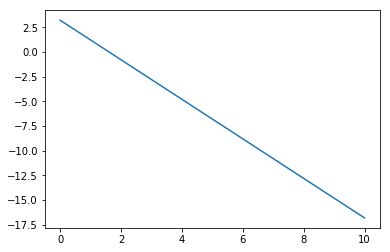

In [34]:
X = np.linspace(0,10, 11).reshape((-1, 1))

T = -2 * X + 3.2

ls = LinearRegress()

ls.train(X, T)

plt.plot(ls.use(X))

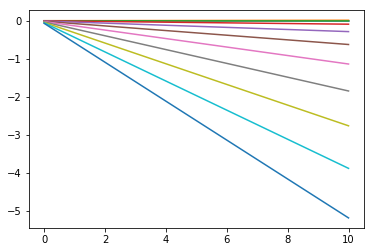

In [35]:
lms = LMS(0.001)
for x, t in zip(X, T):
    lms.train_step(x, t)
    plt.plot(lms.use(X))

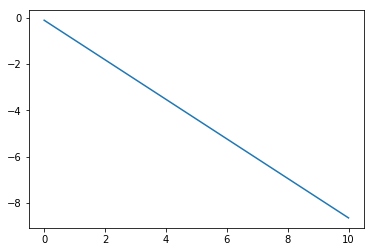

In [36]:
lms.train(X, T)
plt.plot(lms.use(X))

# Experiments

Apply two methods on the data and discuss the results.
Please describe your experiment and related codes. You may have subsections of results and discussions here.


In [37]:
import pandas as pd
df = pd.read_csv("train.csv")
df

,Choice,A_follower_count,A_following_count,A_listed_count,A_mentions_received,A_retweets_received,A_mentions_sent,A_retweets_sent,A_posts,A_network_feature_1,...,B_following_count,B_listed_count,B_mentions_received,B_retweets_received,B_mentions_sent,B_retweets_sent,B_posts,B_network_feature_1,B_network_feature_2,B_network_feature_3
0,0,228,302,3,0.583979,0.100503,0.100503,0.100503,0.362150,2,...,29808,1689,15.430498,3.984029,8.204331,0.332423,6.988815,66,75.530303,1916.893939
1,0,21591,1179,228,90.456506,25.798292,5.709329,1.111159,5.176620,369,...,848,1610,40.495021,8.943607,3.227677,0.564343,1.070321,163,132.030675,2931.515337
2,0,7310,1215,101,25.503644,9.556347,5.361519,0.591206,3.589718,95,...,482,206,0.734696,0.354379,0.603202,0.100503,0.603202,3,10.333333,277.333333
3,0,20,7,2,7.690824,0.277306,1.331508,0.100503,2.830627,6,...,17637,278,572.874856,390.293681,27.552040,7.167557,32.101906,1762,23.469296,1395.845634
4,1,45589,862,2641,148.854279,36.998884,27.881768,3.333492,23.861282,551,...,1711,181,21.601866,3.581661,6.764657,1.119727,4.563246,85,48.500000,1993.627907
5,0,285735,276251,3417,19.327582,7.292016,0.100503,0.100503,0.100503,60,...,1500,474,40.592512,5.923009,19.648064,1.861765,12.261029,128,107.431818,2481.136364
6,0,285735,276251,3417,19.327582,7.292016,0.100503,0.100503,0.100503,60,...,1001,15117,266.013874,54.345230,13.111904,0.334766,13.665173,928,172.986229,5321.646186
7,1,9512,12,213,52.167068,23.182288,0.362150,0.100503,6.806045,195,...,710,959,7.368643,2.088375,1.598798,0.595812,1.332849,29,205.533333,4302.466667
8,1,2273871,4524,11946,6782.405338,2944.524245,12.955723,2.791861,66.206208,21678,...,551,6209,493.256379,206.660552,4.115212,0.854539,3.075463,2021,75.970098,3865.446569
9,0,182598,1402,3831,145.844910,74.002958,23.549189,0.100503,15.953243,567,...,1299,9950,189.755230,67.310223,11.294831,2.567269,10.933766,791,185.542033,5535.939774


In [38]:
T=df.loc[:,'B_network_feature_1'].values.reshape(-1,1)
T1=df.loc[:,'B_network_feature_1'].values.reshape(-1,1)

X=df.loc[:,'B_mentions_received'].values.reshape(-1,1)




Text(0,0.5,'B_network_feature_1')

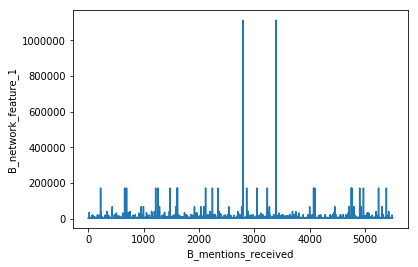

In [39]:
ls = LinearRegress()
ls.train(X, T)

plt.plot(ls.use(X))
plt.xlabel('B_mentions_received')
plt.ylabel('B_network_feature_1')

/Users/chiragjain/anaconda3/lib/python3.6/site-packages/matplotlib/axes/_base.py:2300: RuntimeWarning: overflow encountered in double_scalars
  x1t += delta
/Users/chiragjain/anaconda3/lib/python3.6/site-packages/ipykernel_launcher.py:35: RuntimeWarning: invalid value encountered in subtract


Text(0,0.5,'B_network_feature_1')

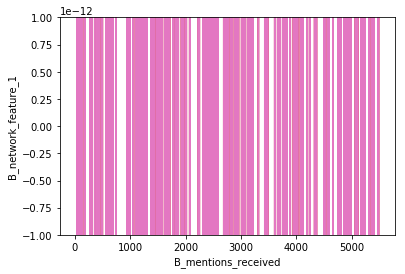

In [40]:
lms = LMS(0.001)
for x, t in zip(X, T1):
    lms.train_step(x, t)
    plt.plot(lms.use(X))
plt.xlabel('B_mentions_received')
plt.ylabel('B_network_feature_1')

Text(0,0.5,'B_network_feature_1')

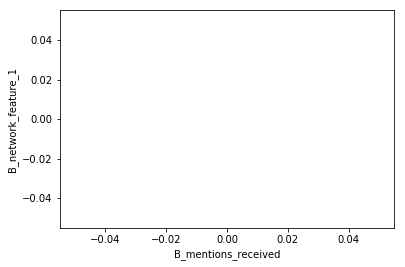

In [41]:
lms.train(X, T1)
plt.plot(lms.use(X))

plt.xlabel('B_mentions_received')
plt.ylabel('B_network_feature_1')

In [42]:
T=df.loc[:,'B_network_feature_1'].values.reshape(-1,1)
T1=df.loc[:,'B_network_feature_1'].values.reshape(-1,1)
X=df.loc[:,'B_retweets_sent'].values.reshape(-1,1)

Text(0,0.5,'B_network_feature_1')

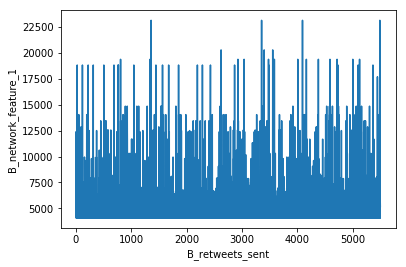

In [43]:
ls = LinearRegress()
ls.train(X, T)

plt.plot(ls.use(X))
plt.xlabel('B_retweets_sent')
plt.ylabel('B_network_feature_1')

Text(0,0.5,'B_network_feature_1')

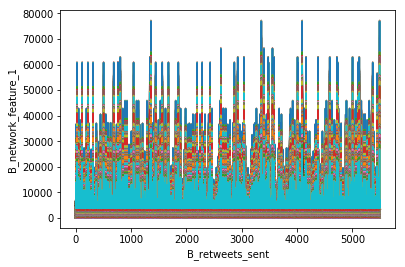

In [44]:
lms = LMS(0.001)
for x, t in zip(X, T1):
    lms.train_step(x, t)
    plt.plot(lms.use(X))
    
plt.xlabel('B_retweets_sent')
plt.ylabel('B_network_feature_1')

Text(0,0.5,'B_network_feature_1')

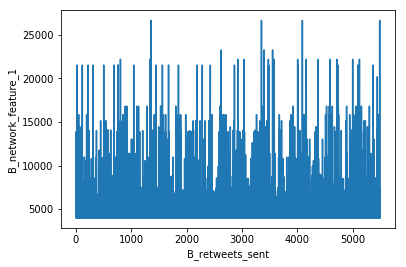

In [45]:
lms.train(X, T1)
plt.plot(lms.use(X))

plt.xlabel('B_retweets_sent')
plt.ylabel('B_network_feature_1')

In [46]:
### Analysis of Data Frame
from sklearn import metrics
import numpy as np

from sklearn.model_selection import train_test_split
train, test = train_test_split(X,T,test_size = 0.4, random_state=40)


ValueError: too many values to unpack (expected 2)

###### For LMS

In [ ]:

print('MAE:', metrics.mean_absolute_error(np.reshape(test,(-1,1)), T1))
print('MSE:', metrics.mean_squared_error(np.reshape(test,(-1,1)), T1))
print('RMSE:', np.sqrt(metrics.mean_squared_error(np.reshape(test,(-1,1)), T1)))




###### For LS

In [ ]:
print('MAE:', metrics.mean_absolute_error(np.reshape(test,(-1,1)), T1))
print('MSE:', metrics.mean_squared_error(np.reshape(test,(-1,1)), T1))
print('RMSE:', np.sqrt(metrics.mean_squared_error(np.reshape(test,(-1,1)), T1)))

## Analysis / Comparison of Results

We can see from the above plots that least squares method was able to represent the model better than lms given learning rate of 0.010. We can say that although lms is computationally less costly, but it is more erronous than least squares model. But, reducing the learning rate leads to lms to converge to least squares model. Also, for large values of learning rate, in our case 1,0.1 and 0.01 the weight matrix tends to alpha and hence is not reasonable. Also, for a very small value again the model overfits. The optimal learning rate lies between 0.001 and 0.00001. Hence, the accuracy of the lms model is largely influenced by alpha.

## Conclusions

In this assignment I gained knowledge about the linear Regression and methods which are used for prediction. Two methods we used were LS and LMS, in which according to me, LS is better than LMS to predict values. I used windspeed and temperature as a feature to train model for the output 'count'.

Linear regression is useful for prediction but there are pairs of attributes which are highly scattered or very far from linear in which case linear regression is not useful. Hence, we need to choose appropriate pairs on which linear regression will be applied and predictions can be made. 
Least square model is computationally costly for large datasets where lms is useful. But the accuracy of lms is largely influenced by alpha. The optimal alpha depends on the dataset and needs to be calculated by trial and error or by experience.
The dataset attributes which resemble a linear relationship can be effectively modeled using least squares method. But occurence of cluster of samples in the dataset may set off the least square model where lms is very useful because of it's on the fly update of weights.
Also, it is useful to split the dataset into training and test sets which allows us to test the model without using additional data.

# References

Dataset: https://archive.ics.uci.edu/ml/datasets/bike+sharing+dataset

https://machinelearningmastery.com/linear-regression-for-machine-learning/

https://www.hackerearth.com/practice/machine-learning/machine-learning-algorithms/beginners-guide-regression-analysis-plot-interpretations/tutorial/


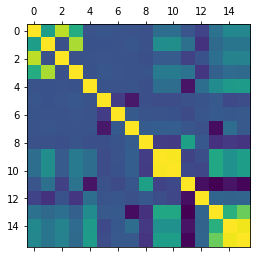

In [22]:
# Extra Credit

import pandas as pd
plt.matshow(df.corr())
    
    

## Grading

DO NOT forget to submit your data! Your notebook is supposed to run well after running your codes. 

Points | | Description
--|--|:--
5 | Introduction  
20 | Data | 
 | 5| description 
 | 5| plots for understanding or analysis 
 | 5| preliminary observation 
 | 5| Preprocessing of the data 
40 | Method | 
 | 5| review
 | 5| explanation of codes
 | 30| Correct implementation (preliminary test)
30 | Experiments | 
 | 5| description, codes
 | 10| visualization of results
 | 15| analysis / comparison of algorithms
5 | Conclusions, References 

# Preliminary Test

In [23]:
##################### WHAT I WILL RELEASE ############

# Self-Test code for accuracy of your model - DO NOT MODIFY THIS
# Primilnary test data
X = np.array([[2,5],
              [6,2],
              [1,9],
              [4,5],
              [6,3],
              [7,4],
              [8,3]])
T = X[:,0, None] * 3 - 2 * X[:, 1, None] + 3
N = X.shape[0]

def rmse(T, Y):
    return np.sqrt(np.sum((T-Y)**2))

model_names = ['LS', 'LMS_All', 'LMS_1STEP']
models = [LinearRegress(), LMS(0.02), LMS(0.02)]
#train
for i, model in enumerate(models):
    print("training ", model_names[i], "...") 
    if i == len(models) -1: 
        # train only one step for LMS2
        model.train_step(X[0], T[0])
    else:
        model.train(X, T)

def check(a, b, eps=np.finfo(float).eps):
    if abs(a-b) > eps:
        print("failed.", a, b)
    else:
        print("passed.")

errors = [1.19e-13, 2.8753214702, 38.0584918251]
for i, model in enumerate(models):
    print("---- Testing ", model_names[i], "...", end=" ") 
    
    # rmse test
    err = rmse(T, model.use(X))
    if check(err, errors[i], eps=1e-10):
        print ("check your weights: ", model.w)
        print ("oracle: ", )


training  LS ...
training  LMS_All ...
training  LMS_1STEP ...
---- Testing  LS ... passed.
---- Testing  LMS_All ... passed.
---- Testing  LMS_1STEP ... passed.
